In [3]:
using Pkg
using Optim
using PyPlot
using LinearAlgebra
using FFTW

In [22]:
#https://stackoverflow.com/questions/56030394/how-to-visualize-fft-of-a-signal-in-julia
# Number of points 
N = 10

t = 1:N
print(t)

1:10

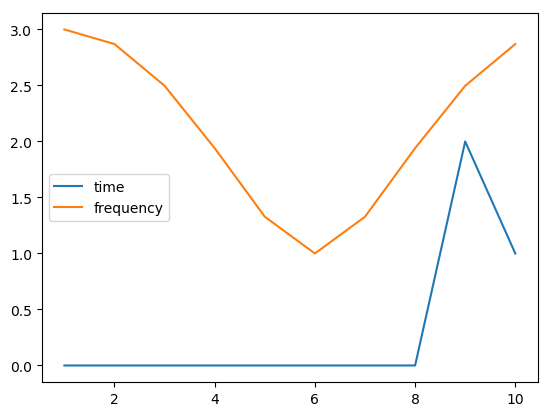

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0](10,)
(10,)
Complex{Float64}[3.0+0.0im, 1.42705+2.4899im, -1.30902+2.12663im, -1.92705-0.224514im, -0.190983-1.31433im, 1.0+0.0im, -0.190983+1.31433im, -1.92705+0.224514im, -1.30902-2.12663im, 1.42705-2.4899im]


In [27]:
# signal 
signal = vcat(zeros(N-2), [2, 1])
print(signal)
println(size(signal))
println(size(collect(t)))

# Fourier Transform of it 
F = fft(signal)

println(F)
# plots 
plot(collect(t), signal, label="time")
show()
plot(collect(t), abs.(F),label="frequency")
legend()
show()